In [1]:
import pandas as pd
import numpy as np
from numpy import load
from modules.mask import getComponents

# def getPhasesArray(int_mask, amount = 0):
#     return [1 for i in range(len(amount)) if (int(int_mask) & (1 << i)) > 0]

def parseArray(amounts_str):
    amounts = amounts_str.replace('[', '').replace(']', '')
    return np.array(amounts.split(','), dtype=np.float32)

all_phases = load('./DataSets/all_phases.npy')

df_origin = pd.read_csv('DataSets/parsedDataset.csv',delimiter = ';')
df = df_origin[df_origin['Error'].isna()].reset_index(drop=True)
df = df.drop(['Error'], axis =1)
df = df.rename(columns={"T": "Temp"})
df['amounts'] = df['amounts'].apply(parseArray)
df['GM'] = df['GM'].apply(parseArray)
df['Components'] = df['Components'].apply(getComponents)
amount_phases = len(df.loc[0, 'GM'])
# df['Components'] = df['Components'].apply(getComponents)
getPhasesArray = lambda x: [1 if (int(x) & (1 << i)) > 0 else 0 for i in range(amount_phases)]
df['phases'] = df['phases'].apply(getPhasesArray)
# df['possible_phases'] = df['possible_phases'].apply(getPhases)
print(df.dtypes)
# df

Unnamed: 0           int64
iter                 int64
Temp                 int64
amounts             object
Components          object
phases              object
ellapsed_time      float64
possible_phases     object
P                    int64
gm_time            float64
GM                  object
dtype: object


In [97]:
import sys

Y = pd.DataFrame(df['phases'].to_list(), columns=all_phases)
print(len(Y))
X = pd.DataFrame(df['GM'].to_list(), columns=all_phases)
X_max = X.replace([np.inf, -np.inf], np.nan).max().max()
# print(len(X[np.isneginf(X)].replace([np.inf, -np.inf], np.nan).min()))
X_min = X.replace([np.inf, -np.inf], np.nan).min().min()
# print(len(X[np.isneginf(X)] ))
# print(X[np.isneginf(X)])

# X[np.isneginf(X)] = X_min
# X[np.isinf(X)] = X_max
X = X.apply(lambda row: row.replace(np.inf, max(row)), axis=1)
X = X.apply(lambda row: row.replace(-np.inf, min(row)), axis=1)
X = X.apply(lambda row: row.fillna(row.max()), axis=1)
# X = X.fillna(X_max)
X = X.multiply(-1)

X_T = pd.DataFrame(df['Temp'].to_list(), columns=['Temp'])
X = pd.concat([X, X_T], axis=1)

X_A = pd.DataFrame(df['amounts'].to_list(), columns=df.loc[0, 'Components'])
X = pd.concat([X, X_A], axis=1)

# X.loc[0:, (X != 0).any(axis=0)]
X

2546


,A15_CR3PT,A2_BCC,AG2BA,AG2BA3,AG2CA,AG2CD3,AG2CE,AG2DY,AG2ER,AG2GA,...,ZRSI2,Temp,CO,CR,MO,NI,TA,V,W,ZR
0,9661.843750,9661.843750,9661.843750,9661.843750,9661.843750,9661.843750,9661.843750,9661.843750,9661.843750,9661.843750,...,9661.843750,1991,0.106400,0.070539,0.090987,0.083107,0.186603,0.185830,0.173657,0.102877
1,-65905.210938,-65905.210938,-65905.210938,-65905.210938,-65905.210938,-65905.210938,-65905.210938,-65905.210938,-65905.210938,-65905.210938,...,-65905.210938,1613,0.055819,0.064890,0.210491,0.105781,0.080682,0.130759,0.229928,0.121651
2,-138751.656250,-138751.656250,-138751.656250,-138751.656250,-138751.656250,-138751.656250,-138751.656250,-138751.656250,-138751.656250,-138751.656250,...,-138751.656250,1253,0.077059,0.054417,0.115156,0.176073,0.285718,0.120561,0.076375,0.094640
3,-281122.312500,-281122.312500,-281122.312500,-281122.312500,-281122.312500,-281122.312500,-281122.312500,-281122.312500,-281122.312500,-281122.312500,...,-281122.312500,429,0.149075,0.303064,0.285876,0.050672,0.058776,0.050181,0.051108,0.051249
4,-134564.046875,-134564.046875,-134564.046875,-134564.046875,-134564.046875,-134564.046875,-134564.046875,-134564.046875,-134564.046875,-134564.046875,...,-134564.046875,1324,0.295175,0.298476,0.062971,0.121728,0.055390,0.062540,0.051648,0.052072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,27437.630859,27437.630859,27437.630859,27437.630859,27437.630859,27437.630859,27437.630859,27437.630859,27437.630859,27437.630859,...,27437.630859,2700,0.116299,0.320491,0.294819,0.064281,0.051771,0.050616,0.051265,0.050458
2542,-85197.757812,-85197.757812,-85197.757812,-85197.757812,-85197.757812,-85197.757812,-85197.757812,-85197.757812,-85197.757812,-85197.757812,...,-85197.757812,1533,0.087177,0.096459,0.282742,0.093406,0.085438,0.148841,0.088184,0.117752
2543,-109377.898438,-109377.898438,-109377.898438,-109377.898438,-109377.898438,-109377.898438,-109377.898438,-109377.898438,-109377.898438,-109377.898438,...,-109377.898438,1459,0.295111,0.334531,0.098789,0.054356,0.051777,0.063992,0.050920,0.050525
2544,-59137.714844,-59137.714844,-59137.714844,-59137.714844,-59137.714844,-59137.714844,-59137.714844,-59137.714844,-59137.714844,-59137.714844,...,-59137.714844,1688,0.134875,0.159361,0.216705,0.238929,0.067705,0.070183,0.054115,0.058125


In [98]:
# !py -m pip install scikit-learn

In [99]:
from sklearn import preprocessing

def normDFColumn(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled=pd.DataFrame(min_max_scaler.fit_transform(df.T).T,columns=df.columns)
    # x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)
def normDFRow(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    # x_scaled=pd.DataFrame(min_max_scaler.fit_transform(df.T).T,columns=df.columns)
    x_scaled = min_max_scaler.fit_transform(df)
    return pd.DataFrame(x_scaled)
X[all_phases] = normDFColumn(X[all_phases])
X[['Temp']] = normDFRow(X[['Temp']])
X[df.loc[0, 'Components']] = normDFRow(X[df.loc[0, 'Components']])
X

,A15_CR3PT,A2_BCC,AG2BA,AG2BA3,AG2CA,AG2CD3,AG2CE,AG2DY,AG2ER,AG2GA,...,ZRSI2,Temp,CO,CR,MO,NI,TA,V,W,ZR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.626296,0.187664,0.067194,0.136759,0.110406,0.456813,0.474637,0.412629,0.182719
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.486296,0.018873,0.048336,0.536151,0.186040,0.102594,0.282197,0.600399,0.247595
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.352963,0.089753,0.013380,0.217535,0.420511,0.788270,0.246564,0.088010,0.154259
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.047778,0.330068,0.843354,0.788093,0.002212,0.029335,0.000632,0.003697,0.004315
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.379259,0.817605,0.828038,0.043125,0.239235,0.018013,0.043819,0.005498,0.007160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.888889,0.220696,0.901526,0.817981,0.047607,0.005911,0.002153,0.004220,0.001582
2542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.456667,0.123518,0.153714,0.777621,0.144761,0.118498,0.345383,0.127416,0.234122
2543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.429259,0.817390,0.948389,0.162833,0.014502,0.005930,0.048892,0.003071,0.001812
2544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.514074,0.282685,0.363678,0.556919,0.630179,0.059197,0.070527,0.013732,0.028077


In [100]:
# X.corr().abs()
corr = X.loc[:, (X != 0).any(axis=0)].corr().abs()
corr

,AL3M_D022,ALCR2_C11B,ALM_D019,ALTA_SIGMA,ALTI,B2,BCT_A5,CHI_A12,CO11ZR2,CO17Y2,...,W2ZR,Temp,CO,CR,MO,NI,TA,V,W,ZR
AL3M_D022,1.000000,0.995643,0.995404,0.995688,0.996233,0.992900,0.273219,0.996734,0.995441,0.997213,...,0.999009,0.771362,0.018481,0.086736,0.040229,0.053117,0.005436,0.009748,0.039191,0.013639
ALCR2_C11B,0.995643,1.000000,0.995637,0.996381,0.996604,0.995407,0.261767,0.997305,0.984719,0.997345,...,0.995146,0.770763,0.050510,0.025852,0.021846,0.035494,0.007280,0.010517,0.041551,0.017223
ALM_D019,0.995404,0.995637,1.000000,0.999305,0.999716,0.996846,0.269448,0.998653,0.985244,0.998773,...,0.992946,0.777850,0.001795,0.023595,0.021731,0.028991,0.025113,0.016379,0.016620,0.005488
ALTA_SIGMA,0.995688,0.996381,0.999305,1.000000,0.999605,0.997716,0.263578,0.999485,0.986660,0.999133,...,0.994058,0.781980,0.004475,0.028081,0.015688,0.016748,0.015774,0.002681,0.034596,0.010486
ALTI,0.996233,0.996604,0.999716,0.999605,1.000000,0.997580,0.269085,0.999499,0.986637,0.999093,...,0.994143,0.776738,0.010036,0.030825,0.017779,0.029660,0.012289,0.004903,0.027141,0.004771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NI,0.053117,0.035494,0.028991,0.016748,0.029660,0.023088,0.062322,0.026205,0.053912,0.022073,...,0.045437,0.001874,0.331370,0.321787,0.193436,1.000000,0.017019,0.010205,0.015941,0.011679
TA,0.005436,0.007280,0.025113,0.015774,0.012289,0.002259,0.055286,0.002985,0.025952,0.006910,...,0.017966,0.013895,0.313168,0.333221,0.165784,0.017019,1.000000,0.201774,0.141663,0.121303
V,0.009748,0.010517,0.016379,0.002681,0.004903,0.008497,0.079223,0.009939,0.027240,0.000569,...,0.019405,0.012862,0.260409,0.267894,0.175737,0.010205,0.201774,1.000000,0.279256,0.298345
W,0.039191,0.041551,0.016620,0.034596,0.027141,0.039223,0.050197,0.039792,0.053409,0.031424,...,0.047862,0.026709,0.219165,0.228062,0.133578,0.015941,0.141663,0.279256,1.000000,0.397541


In [102]:
def nonZeroColumns(df):
    return df.loc[:, (df != 0).any(axis=0)]
nonZeroColumns(Y).columns

Index(['ALTA_SIGMA', 'CHI_A12', 'CO2ZR', 'CO3MO', 'COTA2', 'COV3_A15', 'COZR',
       'CRNI2', 'GAS', 'LAVES_C14', 'LAVES_C15', 'LAVES_C36', 'LIQUID',
       'MU_PHASE', 'NI10ZR7', 'NI11ZR9', 'NI21ZR8', 'NI2V7', 'NI3ZR', 'NI5ZR',
       'NI7ZR2', 'NITA', 'NITA2', 'NIW2', 'NIZR', 'NIZR2', 'PT2V', 'P_PHASE',
       'SIGMA', 'W2ZR'],
      dtype='object')

In [7]:
corr

,AL3M_D022,ALCR2_C11B,ALM_D019,ALTA_SIGMA,ALTI,B2,BCT_A5,CHI_A12,CO11ZR2,CO17Y2,...,W2ZR,Temp,CO,CR,MO,NI,TA,V,W,ZR
AL3M_D022,1.000000,0.995643,0.995404,0.995688,0.996233,0.992900,0.273219,0.996734,0.995441,0.997213,...,0.999009,0.771362,0.018481,0.086736,0.040229,0.053117,0.005436,0.009748,0.039191,0.013639
ALCR2_C11B,0.995643,1.000000,0.995637,0.996381,0.996604,0.995407,0.261767,0.997305,0.984719,0.997345,...,0.995146,0.770763,0.050510,0.025852,0.021846,0.035494,0.007280,0.010517,0.041551,0.017223
ALM_D019,0.995404,0.995637,1.000000,0.999305,0.999716,0.996846,0.269448,0.998653,0.985244,0.998773,...,0.992946,0.777850,0.001795,0.023595,0.021731,0.028991,0.025113,0.016379,0.016620,0.005488
ALTA_SIGMA,0.995688,0.996381,0.999305,1.000000,0.999605,0.997716,0.263578,0.999485,0.986660,0.999133,...,0.994058,0.781980,0.004475,0.028081,0.015688,0.016748,0.015774,0.002681,0.034596,0.010486
ALTI,0.996233,0.996604,0.999716,0.999605,1.000000,0.997580,0.269085,0.999499,0.986637,0.999093,...,0.994143,0.776738,0.010036,0.030825,0.017779,0.029660,0.012289,0.004903,0.027141,0.004771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NI,0.053117,0.035494,0.028991,0.016748,0.029660,0.023088,0.062322,0.026205,0.053912,0.022073,...,0.045437,0.001874,0.331370,0.321787,0.193436,1.000000,0.017019,0.010205,0.015941,0.011679
TA,0.005436,0.007280,0.025113,0.015774,0.012289,0.002259,0.055286,0.002985,0.025952,0.006910,...,0.017966,0.013895,0.313168,0.333221,0.165784,0.017019,1.000000,0.201774,0.141663,0.121303
V,0.009748,0.010517,0.016379,0.002681,0.004903,0.008497,0.079223,0.009939,0.027240,0.000569,...,0.019405,0.012862,0.260409,0.267894,0.175737,0.010205,0.201774,1.000000,0.279256,0.298345
W,0.039191,0.041551,0.016620,0.034596,0.027141,0.039223,0.050197,0.039792,0.053409,0.031424,...,0.047862,0.026709,0.219165,0.228062,0.133578,0.015941,0.141663,0.279256,1.000000,0.397541


In [107]:
print(len(Y))
nonZeroColumns(Y).columns

2546


Index(['ALTA_SIGMA', 'CHI_A12', 'CO2ZR', 'CO3MO', 'COTA2', 'COV3_A15', 'COZR',
       'CRNI2', 'GAS', 'LAVES_C14', 'LAVES_C15', 'LAVES_C36', 'LIQUID',
       'MU_PHASE', 'NI10ZR7', 'NI11ZR9', 'NI21ZR8', 'NI2V7', 'NI3ZR', 'NI5ZR',
       'NI7ZR2', 'NITA', 'NITA2', 'NIW2', 'NIZR', 'NIZR2', 'PT2V', 'P_PHASE',
       'SIGMA', 'W2ZR'],
      dtype='object')

In [108]:
X.isnull().sum().sum()

0

In [109]:
X = X.to_numpy()
Y = Y.to_numpy()
# Y = Y.astype(float)


In [110]:
print(f'Y_MAX = {np.max([iter.max() for iter in Y])}')
print(f'Y_MIN = {np.min([iter.min() for iter in Y])}')
print(f'Y_shape = {Y.shape}\n')

print(f'X_MAX = {np.max([iter.max() for iter in X])}')
print(f'X_MIN = {np.min([iter.min() for iter in X])}')
print(f'X_shape = {X.shape}')

Y_MAX = 1
Y_MIN = 0
Y_shape = (2546, 2023)

X_MAX = 1.0000001192092896
X_MIN = 0.0
X_shape = (2546, 2032)


In [111]:
shape = len(X[0])
print(shape)
out_shape = len(Y[0])
print(out_shape)
# shape = 2023

2032
2023


Main model

In [112]:
# !py -m pip install sklearn

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.25, random_state=42)

In [114]:
len(X_test)

128

In [265]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.optimizers import SGD
epoch = 100
batch = 32
model = Sequential()
# model.add(tf.keras.layers.BatchNormalization(synchronized=False))
model.add(Dense(256, input_shape=(shape,), activation='tanh', kernel_initializer='he_uniform'))
# model.add(Dense(256, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(8, activation='relu'))
model.add(Dense(out_shape, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.5)
# model.compile(optimizer='adam', loss="mse", metrics=["accuracy", "Precision", "Recall"])
model.compile(optimizer='adam', loss="kullback_leibler_divergence", metrics=["accuracy", "Precision", "Recall"])
H = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch, epochs=epoch)
predictions = model.predict(X[0:len(X)])

Epoch 1/100


c:\Users\Dmitry\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


64/64 [==============================] - 2s 13ms/step - loss: 16.4279 - accuracy: 0.0801 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 9.4085 - val_accuracy: 0.1283 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 7.6150 - accuracy: 0.3531 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 6.9867 - val_accuracy: 0.4791 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 7.0984 - accuracy: 0.4804 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 6.9544 - val_accuracy: 0.4791 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 7.0667 - accuracy: 0.4804 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 6.9245 - val_accuracy: 0.4791 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
64/64 [==============================] 

In [266]:
model.evaluate(X_test, y_test, verbose = 0) 

[5.121318340301514, 0.640625, 1.0, 0.19783197343349457]

In [263]:
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=20)
# trains_ev = []
# test_ev = []
# for train, test in kf.split(X = X, y = Y):
#     trains_ev.append(model.evaluate( X[train], Y[train],verbose=0)[1])
#     test_ev.append(model.evaluate( X[test], Y[test],verbose=0)[1])
# print(np.mean(trains_ev))
# print(np.mean(test_ev))

0.617387056350708


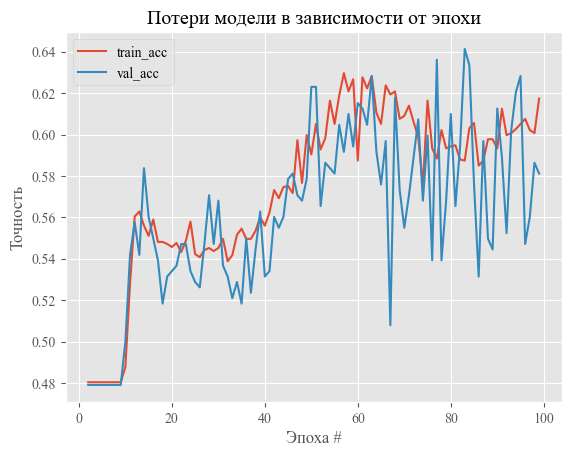

In [276]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})

def saveNNHist(H,cut, name_diagram = 'Точность модели в зависимости от эпохи', epoch = epoch):
    plt.style.use("ggplot")
    plt.figure()
    # plt.plot(np.arange(0, epoch)[cut:], H.history["loss"][cut:], label="train_loss")
    # plt.plot(np.arange(0, epoch)[cut:], H.history["val_loss"][cut:], label="val_loss")
    plt.plot(np.arange(0, epoch)[cut:], H.history["accuracy"][cut:], label="train_acc")
    plt.plot(np.arange(0, epoch)[cut:], H.history["val_accuracy"][cut:], label="val_acc")
    plt.title(name_diagram)
    plt.xlabel("Эпоха #")
    plt.ylabel("Точность")
    plt.legend()
    plt.savefig(f'./StatData/{name_diagram}({batch}).png')
print(H.history["accuracy"][-1])
saveNNHist(H,2,'Потери модели в зависимости от эпохи',epoch)

Evaluate model

In [271]:
predictions_test = model.predict(X_test[0:len(X_test)])

4/4 [==============================] - 0s 2ms/step


In [273]:
def parsePrediction(predictions, top = 8, tres = 0, phases = all_phases):
    if len(predictions) != len(all_phases):
        raise Exception('Wrong prediction dimensions!')
    top_ind = sorted(range(len(predictions)), key=lambda i: predictions[i])[-top:]
    predictions_ind = [(ind,predictions[ind]) for ind in top_ind if predictions[ind] > tres]
    predictions_out = {}
    for ind_prediction in predictions_ind:
        predictions_out[phases[ind_prediction[0]]] = ind_prediction[1]
    return predictions_out

def parseY(y_values, phases = all_phases):
    if len(y_values) != len(all_phases):
        raise Exception(f'Wrong y values dimensions! Should be {len(all_phases)}, but {len(y_values)}')
    return [phases[i] for i in range(len(y_values)) if y_values[i]> 0]

ind = 10
print(f'{parsePrediction(predictions[ind], 5)}\n')
parse_keys = list(parsePrediction(predictions[ind], 4).keys())
parse_keys.sort()
print(parse_keys)
print(parseY(Y[ind]))

{'NIZR': 0.0651794, 'LAVES_C15': 0.12932333, 'LIQUID': 0.16977488, 'NI10ZR7': 0.17950888, 'LAVES_C14': 0.23506448}

['LAVES_C14', 'LAVES_C15', 'LIQUID', 'NI10ZR7']
['LAVES_C14', 'LAVES_C15', 'LIQUID', 'NI10ZR7']


In [275]:
def predictionsStat(predictions, Y, top = 8, tres = 0):
    full_correct = 0
    correct = 0
    incorrect = 0
    all_correct = 0
    not_incorrect = 0
    at_least_one = 0
    for i in range(len(predictions)):
        corr = 0
        incorr = 0
        pred_phases = parsePrediction(predictions[i], top, tres).keys()
        prev = parseY(Y[i])
        for pred_phase in pred_phases:
            if pred_phase in prev:
                corr += 1
            else:
                incorr += 1
        if corr > 0 or corr == len(prev):
            at_least_one += 1
        if corr == len(prev):
            all_correct += 1
        if incorr == 0:
            not_incorrect += 1
        if corr == len(prev) and incorr == 0:
            full_correct += 1
        correct += corr
        incorrect += incorr
    return len(Y), full_correct, all_correct, not_incorrect, at_least_one

def printPrediction(predictions, Y, top = 8, tres = 0):
    amount, full_correct, all_correct, not_incorrect, at_least_one = predictionsStat(predictions, Y, top, tres)
    print(f'All predictions = {amount}')
    print(f'All fully correct prediction = {full_correct}')
    print(f'All correct prediction = {all_correct}')
    print(f'Not error in prediction = {not_incorrect}')
    print(f'One prediction correct = {at_least_one}')
    # print(f'Correct mean value = {correct/len(Y)}')
    # print(f'Incorrect mean value = {incorrect/len(Y)}')

def getStatPrediction(predictions, Y, range_filter, top = 8):
    amounts = []
    full_correct = []
    all_correct = []
    not_correct = []
    at_least_one = []
    # correct_mean = []
    # not_correct_mean = []
    for i in range_filter:
        a, f, c, n, one = predictionsStat(predictions, Y, top, i)
        amounts.append(a)
        full_correct.append(f)
        all_correct.append(c)
        not_correct.append(n)
        at_least_one.append(one)
    # correct_mean.append(corr_mean)
    # not_correct_mean.append(incorr_mean)
    full_correct = [i/amounts[0] for i in full_correct]
    all_correct = [i/amounts[0] for i in all_correct]
    not_correct = [i/amounts[0] for i in not_correct]
    at_least_one = [i/amounts[0] for i in at_least_one]
    return full_correct, all_correct, not_correct, at_least_one

def plotFilterResults(full_correct, all_correct, not_correct, at_least_one, range_filter, diagram_name = "Значение фильтра для предсказания"):
    # plt.plot(range_filter, amounts, label="amounts")
    plt.plot(range_filter, full_correct, label="Все фазы предсказаны корректно")
    plt.plot(range_filter, all_correct, label="Все стабильные фазы предсказаны")
    plt.plot(range_filter, not_correct, label="Предсказания без лишних фаз")
    plt.plot(range_filter, at_least_one, label="Одна из фаз корректна")
    # plt.plot(range_filter, correct_mean, label="correct_mean")
    # plt.plot(range_filter, not_correct_mean, label="not_correct_mean")
    plt.xlabel("Значение фильтра")
    plt.ylabel("Процент предсказания")
    plt.legend()
    plt.savefig(f'./StatData/{diagram_name}.png')



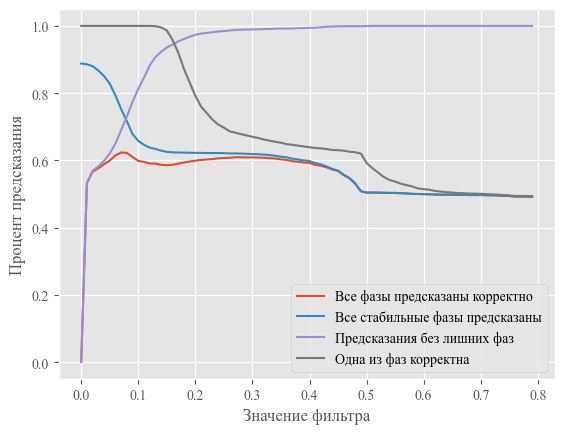

In [277]:
range_filter = np.arange (0, 0.8, 0.01)
full_correct, all_correct, not_correct, at_least_one = getStatPrediction(predictions, Y, range_filter)   
plotFilterResults(full_correct, all_correct, not_correct, at_least_one, range_filter,  "Значение фильтра для предсказания (все)")

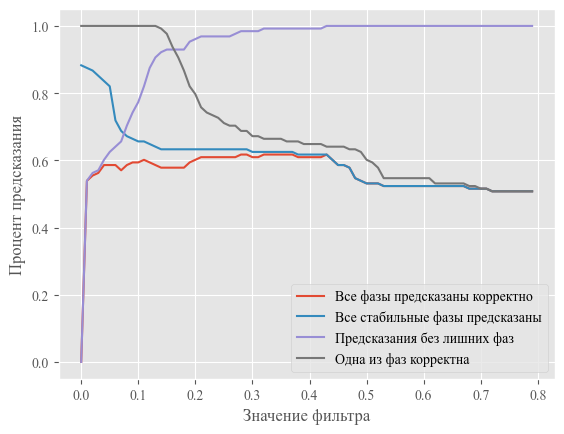

In [274]:
trange_filter = np.arange (0, 0.8, 0.01)
tfull_correct, tall_correct, tnot_correct, tat_least_one = getStatPrediction(predictions_test, y_test, trange_filter, 8)   
plotFilterResults(tfull_correct, tall_correct, tnot_correct, tat_least_one,trange_filter,  "Значение фильтра для предсказания (тест)")

In [281]:
import math

def getStatAtFilter(stat, filter_value, filter_range):
    i = 0
    if len(stat) < len(filter_range):
        print("Wrong dimensions of stat or filter!")
        return -1
    for f in filter_range:
        if math.isclose(f, filter_value):
            return stat[i]
        i += 1
    return -1
def getStatAtValue(stat, value, filter_range):
    i = 0
    if len(stat) < len(filter_range):
        print("Wrong dimensions of stat or filter!")
        return -1, -1
    for f in filter_range:
        if math.isclose(stat[i], value):
            print(f'At filter {f} - value is {value} ')
            return f
        i += 1
    print(stat[-1])
    return value, filter_range[0]
def printAllResults(full_correct, all_correct, not_correct, at_least_one,filter_value, range_filter):
    print('tfull_correct', getStatAtFilter(full_correct, filter_value, range_filter))
    print('tall_correct', getStatAtFilter(all_correct, filter_value, range_filter))
    print('tnot_correct', getStatAtFilter(not_correct, filter_value, range_filter))
    print('tat_least_one', getStatAtFilter(at_least_one, filter_value, range_filter))

for f_value in [0.13,0.15,0.16,0.4]:
    print(f_value)
    printAllResults(full_correct, all_correct, not_correct, at_least_one,f_value,range_filter)
# getStatAtValue(tfull_correct, np.max(tfull_correct), trange_filter)
# getStatAtValue(tall_correct, np.max(tall_correct), trange_filter)
# getStatAtValue(tnot_correct, np.max(tnot_correct), trange_filter)
# getStatAtValue(tat_least_one, np.max(tat_least_one), trange_filter)

0.13
tfull_correct 0.5907305577376276
tall_correct 0.6343283582089553
tnot_correct 0.9073055773762765
tat_least_one 0.9992144540455616
0.15
tfull_correct 0.5860172820109977
tall_correct 0.6256873527101335
tnot_correct 0.9359780047132757
tat_least_one 0.9866457187745483
0.16
tfull_correct 0.5871956009426551
tall_correct 0.6241162608012569
tnot_correct 0.9442262372348782
tat_least_one 0.9587588373919874
0.4
tfull_correct 0.5926944226237235
tall_correct 0.5981932443047918
tnot_correct 0.9945011783189317
tat_least_one 0.6394344069128044


Dummy model

0.34
tfull_correct 0.5546875
tall_correct 0.609375
tnot_correct 0.9375
tat_least_one 1.0
0.35
tfull_correct 0.5625
tall_correct 0.609375
tnot_correct 0.9453125
tat_least_one 0.9921875
0.5
tfull_correct 0.5234375
tall_correct 0.53125
tnot_correct 0.984375
tat_least_one 0.734375


In [ ]:

inputs = tf.keras.layers.Input(shape=(shape,))
d = tf.keras.layers.Dense(shape, name='out')
output = d(inputs)
model = tf.keras.models.Model(
   inputs=inputs, outputs= output)
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["mae", "acc"])
model.fit(X,  Y, batch_size=64, epochs=5)
model.metrics_names

Epoch 1/5
8/8 [==============================] - 1s 90ms/step - loss: 0.0082 - mae: 0.0591 - acc: 0.0022
Epoch 2/5
8/8 [==============================] - 1s 90ms/step - loss: 0.0033 - mae: 0.0380 - acc: 0.3634
Epoch 3/5
8/8 [==============================] - 1s 94ms/step - loss: 0.0020 - mae: 0.0273 - acc: 0.2907
Epoch 4/5
8/8 [==============================] - 1s 91ms/step - loss: 0.0015 - mae: 0.0212 - acc: 0.2423
Epoch 5/5
8/8 [==============================] - 1s 97ms/step - loss: 0.0013 - mae: 0.0174 - acc: 0.2511


['loss', 'mae', 'acc']

KFold model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

# First define baseline model. Then use it in Keras Classifier for the training
def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(15, input_dim = shape, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(shape, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

estimator = KerasClassifier(build_fn = baseline_model, epochs = 10, batch_size = 10, verbose = 0)
# KFold Cross Validation
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
# Try different values of splits e.g., 10

# Object to describe the result
results = cross_val_score(estimator, X, Y, cv = kfold)
# Result
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/tmp/ipykernel_18479/1024357918.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn = baseline_model, epochs = 10, batch_size = 10, verbose = 0)


Result: 32.58% (9.55%)
